## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data()
data.add(x, y)

mosm = mogptk.MOSM(data, Q=3)
mosm.init_params()
mosm.train()

mosm.set_prediction_range(0, 0.0, 5.0, n=200)
x_pred, mu_pred, var_pred = mosm.predict()
```

In [2]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

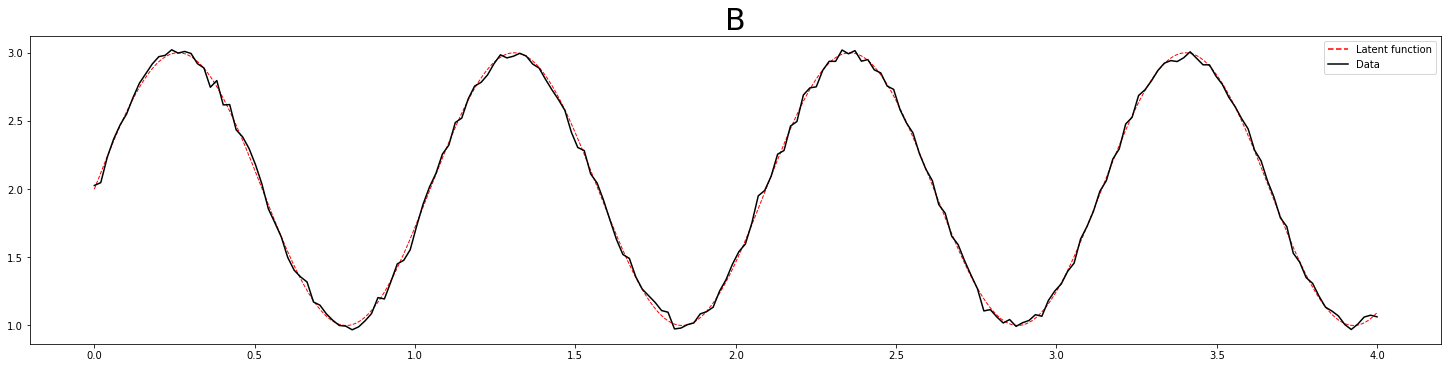

In [3]:
#data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data = mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)
data.plot()

In [ ]:
data.transform(mogptk.TransformLog)
data.plot()

In [ ]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

In [ ]:
sm.init_params()
display(sm.get_params())
#mogptk.plot_sm_psd(sm)

In [ ]:
sm.train(method='BFGS')
display(sm.get_params())
#mogptk.plot_sm_psd(sm)

In [ ]:
sm.build()
sm.set_pred_range(0, 0.0, 5.0, 2000)
sm.predict()
sm.data[0].plot()

In [ ]:
sm.build()
sm.save('sm')

In [ ]:
sm2 = mogptk.LoadModel('sm')
sm2.data[0].set_pred_range(0.0, 10.0, n=2000)
sm2.predict()
sm2.data[0].plot()

## MOSM

In [45]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

(200, 2) (200, 1)
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-9822da3b-228/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-42-b9e63739213e>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 35, in __init__
    model._build(self, kernel_set, likelihood, variational, sparse, like_params)  File "../mogptk/model.py", line 118, in _build
    self.model = gpflow.models.SVGP(x, y, kernel, self.likelihood)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-177>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/cor

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'MultiOutputSpectralMixture-7a651393-237/mean/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-43-b9e63739213e>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 35, in __init__
    model._build(self, kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-193>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/env

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'MultiOutputSpectralMixture-cbfe9e7d-245/mean/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-43-b9e63739213e>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 35, in __init__
    model._build(self, kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-193>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/env

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-05fca2d1-261/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-43-b9e63739213e>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 35, in __init__
    model._build(self, kernel_set, likelihood, variational, sparse, like_params)  File "../mogptk/model.py", line 118, in _build
    self.model = gpflow.models.SVGP(x, y, kernel, self.likelihood)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-177>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", 

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'MultiOutputSpectralMixture-ba3498bd-198/delay/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-42-b9e63739213e>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 35, in __init__
    model._build(self, kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-193>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/en

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'MultiOutputSpectralMixture-3b758046-231/delay/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-43-b9e63739213e>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 35, in __init__
    model._build(self, kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-193>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3/en

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'MultiOutputSpectralMixture-19876d8b-212/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-42-b9e63739213e>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 35, in __init__
    model._build(self, kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-193>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'MultiOutputSpectralMixture-c040face-204/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-42-b9e63739213e>", line 1, in <module>
    mosm = mogptk.MOSM(data, Q=3)  File "../mogptk/mosm.py", line 35, in __init__
    model._build(self, kernel_set, likelihood, variational, sparse, like_params)  File "</home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/decorator.py:decorator-gen-193>", line 2, in __init__  File "/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/gpflow/core/compilable.py", line 157, in init_wrapper
    self.initialize(force=True)  File "/home/taco/anaconda3

[{'magnitude': array([-0.06797629]),
  'mean': array([[-0.10391853]]),
  'variance': array([[0.06829901]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([-1.35723018]),
  'mean': array([[0.91239605]]),
  'variance': array([[0.67859917]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([0.28925461]),
  'mean': array([[-1.15276211]]),
  'variance': array([[0.66795889]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.79621209])}]

In [46]:
mosm.estimate_params(plot=True)
display(mosm.get_params())

[{'magnitude': array([1.]),
  'mean': array([[3.03271469]]),
  'variance': array([[0.55986866]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([1.]),
  'mean': array([[5.62771799]]),
  'variance': array([[0.21145733]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([1.]),
  'mean': array([[2.0009664]]),
  'variance': array([[0.18710255]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.01684197])}]

In [48]:
mosm.fix_param('variance')
mosm.train()
display(mosm.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -368.169946
  Number of iterations: 1
  Number of functions evaluations: 3
Done in  0.016882304350535074  minutes


[{'magnitude': array([0.00038196]),
  'mean': array([[0.37058832]]),
  'variance': array([[0.55986866]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([0.43249426]),
  'mean': array([[5.88954415]]),
  'variance': array([[0.21145733]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([1.1563401]),
  'mean': array([[0.03161119]]),
  'variance': array([[0.18710255]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.0007965])}]

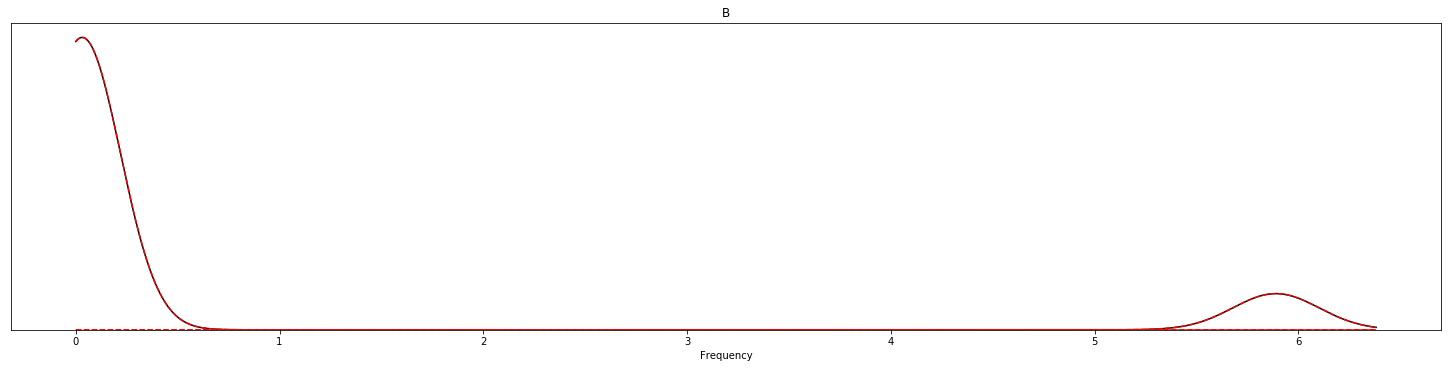

In [55]:
mosm.plot()

(array([[[0.        ],
         [0.02512563],
         [0.05025126],
         [0.07537688],
         [0.10050251],
         [0.12562814],
         [0.15075377],
         [0.1758794 ],
         [0.20100503],
         [0.22613065],
         [0.25125628],
         [0.27638191],
         [0.30150754],
         [0.32663317],
         [0.35175879],
         [0.37688442],
         [0.40201005],
         [0.42713568],
         [0.45226131],
         [0.47738693],
         [0.50251256],
         [0.52763819],
         [0.55276382],
         [0.57788945],
         [0.60301508],
         [0.6281407 ],
         [0.65326633],
         [0.67839196],
         [0.70351759],
         [0.72864322],
         [0.75376884],
         [0.77889447],
         [0.8040201 ],
         [0.82914573],
         [0.85427136],
         [0.87939698],
         [0.90452261],
         [0.92964824],
         [0.95477387],
         [0.9798995 ],
         [1.00502513],
         [1.03015075],
         [1.05527638],
         [1

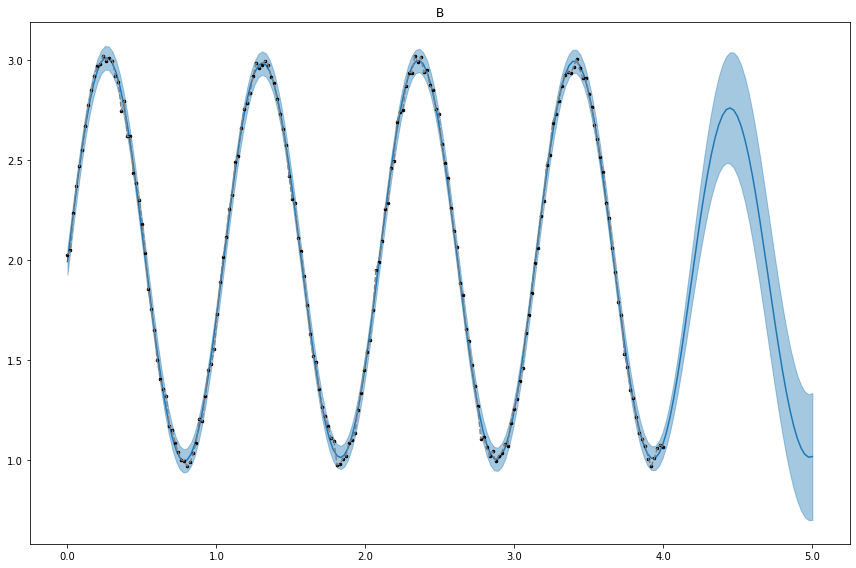

In [74]:
data.set_pred_range(0.0, 5.0, n=200)
mosm.predict(plot=True)
#mosm.plot_prediction()

In [ ]:
mosm.save('mosm')

In [ ]:
mosm2 = mogptk.LoadModel('mosm')
mosm2.plot()

In [ ]:
mosm2.set_pred_range(0, 0.0, 5.0, n=200)
mosm2.predict()
mogptk.plot_prediction(mosm2);

## SM-LMC

In [ ]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

In [ ]:
smlmc.init_params(plot=True)
display(smlmc.get_params())

In [ ]:
smlmc.train()
display(smlmc.get_params())

In [ ]:
smlmc.build()
smlmc.set_pred_range(0, 0.0, 5.0, n=200)
smlmc.predict()
mogptk.plot_prediction(smlmc);

## CSM

In [ ]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

In [ ]:
csm.init_params()
display(csm.get_params())

In [ ]:
csm.train()
display(csm.get_params())

In [ ]:
csm.build()
csm.set_pred_range(0, 0.0, 5.0, n=200)
csm.predict()
mogptk.plot_prediction(csm);

## CG

In [ ]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

In [ ]:
cg.init_params()
display(cg.get_params())

In [ ]:
cg.train(method='Adam')
display(cg.get_params())

In [ ]:
cg.build()
cg.set_pred_range(0, 0.0, 5.0, n=200)
cg.predict()
mogptk.plot_prediction(cg);